# City of Chicago Yearly Budget Analysis - Analysis

Data is taken from the City of Chicago Data Portal website:

https://data.cityofchicago.org/

Specifically the 2011 through 2017 "Budget Ordinance - Positions and Salaries" APIs found in the Administration & Finance category

## Insert source info for financial data

## Read in the Data

- City of Chicago Total Budgets (by Department) from 2011 to 2017
- City of Chicago Total Employees (by Department) from 2011 to 2017
- City of Chicago Average Salaries (by Department) from 2011 to 2017
- City of Chicago Budget Differences (by Department) between 2011 and 2017
- City of Chicago Average Salary Differences (by Department) between 2011 and 2017
- City of Chicago Financial Information from 2011 to 2016 (2017 information not yet available

In [16]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
# Read in the csv's created for the project
dep_budgets = pd.read_csv("dep_budgets.csv", encoding="ISO-8859-1")
dep_count = pd.read_csv("dep_count.csv", encoding="ISO-8859-1")
dep_salaries = pd.read_csv("dep_salaries.csv", encoding="ISO-8859-1")
diff_budgets_sorted = pd.read_csv("diff_budgets_sorted.csv", encoding="ISO-8859-1")
diff_salaries_sorted = pd.read_csv("diff_salaries_sorted.csv", encoding="ISO-8859-1")
total_budgets = pd.read_csv("total_budgets.csv", encoding="ISO-8859-1")
total_dep_emp = pd.read_csv("total_dep_emp.csv", encoding="ISO-8859-1")

# A list of all the years included in the dataset
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

## Chicago Financial Data Analysis

- Plot 1: Chicago Financial Data from 2011 to 2017
- Plot 2: Total Revenue vs Property Tax Revenue

Text(0.5,1,'City of Chicago Financial Summary (2011 to 2017)')

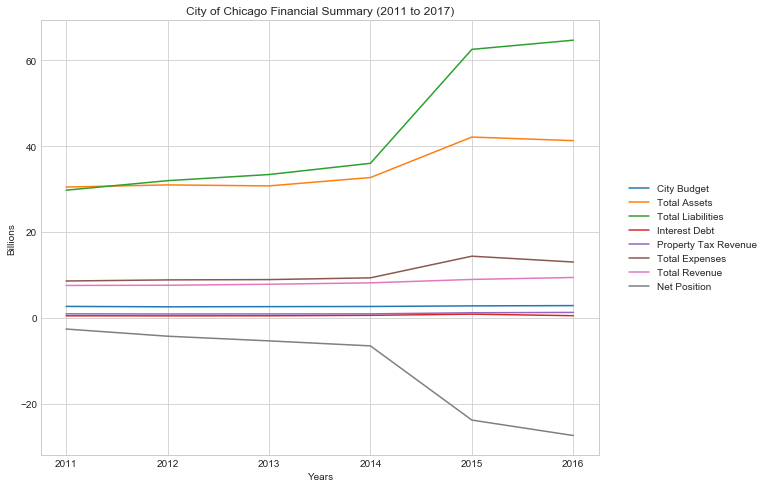

In [18]:
# Adjust figure size
plt.figure(figsize=(10,8))

# Plot the financial data
plt.plot(total_budgets["Year"], total_budgets["City Budget"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Assets"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Liabilities"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Interest Debt"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Property Tax Revenue"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Expenses"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Revenue"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Net Position"]/1000000000)

# format the plot
sns.set_style("whitegrid")
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("Billions")
plt.xlabel("Years")
plt.title("City of Chicago Financial Summary (2011 to 2017)")


In [19]:
import scipy.stats as stats
from scipy.stats.stats import pearsonr
Ttest = total_budgets[["Year", "Total Revenue", "Property Tax Revenue"]]

x = Ttest['Total Revenue']
y = Ttest['Property Tax Revenue']

pearsonr(x, y)

(0.9607022348300461, 0.002286127469743827)

Text(0.5,1,'Total Revenue vs Property Tax')

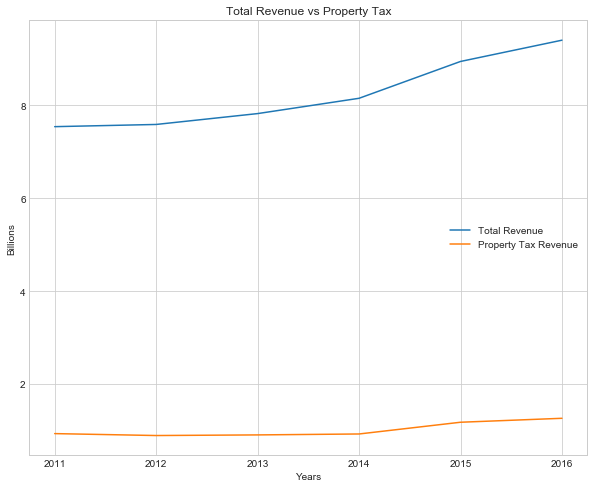

In [20]:
plt.figure(figsize=(10,8))

plt.plot(Ttest['Year'], (Ttest['Total Revenue']/1000000000))
plt.plot(Ttest['Year'], (Ttest['Property Tax Revenue']/1000000000))

sns.set_style("whitegrid")
plt.legend(loc="right")
plt.ylabel("Billions")
plt.xlabel("Years")
plt.title("Total Revenue vs Property Tax")

Text(0,0.5,'Budget Changes (millions)')

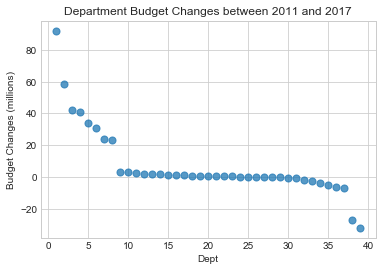

In [21]:
# empty lists to append employee data to
ticks1 = []
budget_changes = []

# loop to create ticks for plotting and append above
for x in range(1,len(diff_budgets_sorted)+1):
    ticks1.append(x)
    
# Loop to append department budget changes to the list above
for x in range(0,len(diff_budgets_sorted)):
    
    budget_changes.append(diff_budgets_sorted.iloc[x, 1])

# create a dataframe for plotting
budget_changes_df = pd.DataFrame({"Dept": ticks1,
                                 "Budget Changes": budget_changes})

# plot sorted budget changes
sns.regplot(x=budget_changes_df["Dept"], y=budget_changes_df["Budget Changes"]/1000000, fit_reg=False, \
                 scatter_kws={"s": 50,"alpha":.75})

# format the plot
plt.title("Department Budget Changes between 2011 and 2017")
plt.ylabel("Budget Changes (millions)")

## Chicago Employee Data Analysis

- Plot 1: Number of City Employees from 2011 to 2017
- Plot 2a-d: Department Budget vs Number of Employees
- Plot 3: Type of City Employees from 2011 to 2017

Text(0.5,1,'City of Chicago Total Employees (2011 to 2017)')

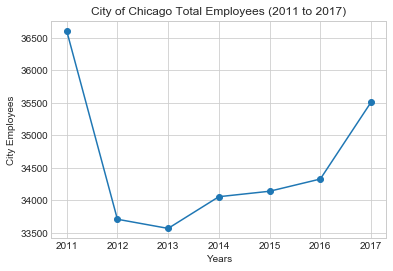

In [22]:
# empty list to append employee data to for plotting
city_employees = []

# loop through the Total Employees (by Department) datafrome and append employee sums to the list
for year in years:

    city_employees.append(dep_count[f"{year} Dept Total Employees"].sum())
    
# plot total number of employees per year
plt.plot(years, city_employees, marker='o')

# format the plot
plt.ylabel("City Employees")
plt.xlabel("Years")
plt.title("City of Chicago Total Employees (2011 to 2017)")

Text(0.5,1.09,'Dept Budget vs Dept Employees (2014-2017)')

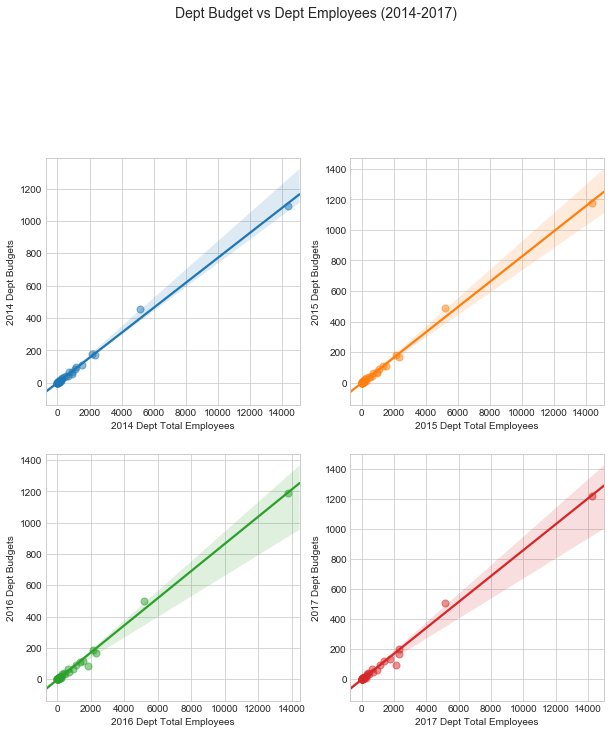

In [23]:
#plot Department Budget vs. Number of Employees using seaborn library going back 4 years
fig1, ax1 = plt.subplots(figsize=(10,10), ncols=2, nrows=2)

sns.regplot(x=total_dep_emp["2014 Dept Total Employees"], y=dep_budgets["2014 Dept Budgets"]/1000000, fit_reg=True, \
                  scatter_kws={"s": 50,"alpha":.5}, ax=ax1[0][0])
sns.regplot(x=total_dep_emp["2015 Dept Total Employees"], y=dep_budgets["2015 Dept Budgets"]/1000000, fit_reg=True, \
                  scatter_kws={"s": 50,"alpha":.5}, ax=ax1[0][1])
sns.regplot(x=total_dep_emp["2016 Dept Total Employees"], y=dep_budgets["2016 Dept Budgets"]/1000000, fit_reg=True, \
                  scatter_kws={"s": 50,"alpha":.5}, ax=ax1[1][0])
sns.regplot(x=total_dep_emp["2017 Dept Total Employees"], y=dep_budgets["2017 Dept Budgets"]/1000000, fit_reg=True, \
                  scatter_kws={"s": 50,"alpha":.5}, ax=ax1[1][1])

plt.suptitle("Dept Budget vs Dept Employees (2014-2017)", y = 1.09, fontsize=14)

Text(0.5,1,'Annual, Hourly and Monthly Salaried Employees (2011 to 2017)')

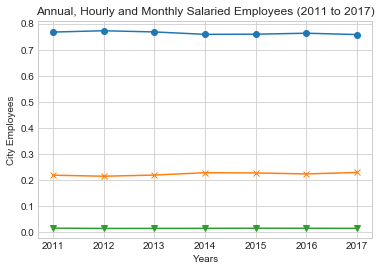

In [24]:
# empty lists to append employee data to
annual_employees = []
hourly_employees = []
monthly_employees = []

# loop through the Total Employees (by Department) dataframe and append % employee type to the lists above
for year in years:

    annual_employees.append(dep_count[f"{year} Dept Annual Employees"].sum()/dep_count[f"{year} Dept Total Employees"].sum())
    hourly_employees.append(dep_count[f"{year} Dept Hourly Employees"].sum()/dep_count[f"{year} Dept Total Employees"].sum())
    monthly_employees.append(dep_count[f"{year} Dept Monthly Employees"].sum()/dep_count[f"{year} Dept Total Employees"].sum())
    
# plot percentage of each employee type per year
plt.plot(years, annual_employees, marker='o')
plt.plot(years, hourly_employees, marker='x')
plt.plot(years, monthly_employees, marker='v')

# format the plot
plt.ylabel("City Employees")
plt.xlabel("Years")
plt.title("Annual, Hourly and Monthly Salaried Employees (2011 to 2017)")

## Chicago Salary Data Analysis

- Plot 1: Average Salary Box Plot for 2011 to 2017
- Plot 2: Department Salary Changes between 2011 and 2017

In [25]:
# empty lists to append employee data to
year_column = []
salaries_column = []

# set count to 1
count = 1

# loop throuhg the Average Salaries (by Department) dataframe and append salary data and year to the empty lists above 
for year in years:
    
    for x in range(0,len(dep_salaries)):
        
        if dep_salaries.iloc[x, count] != 0:
            salaries_column.append(dep_salaries.iloc[x, count])
            year_column.append(year)
        
    count = count + 1   

In [26]:
# create a dataframe for plotting
stat_sal = pd.DataFrame({"Year": year_column,
                           "Avg Salary": salaries_column})

stat_sal_df = stat_sal[["Year", "Avg Salary"]]

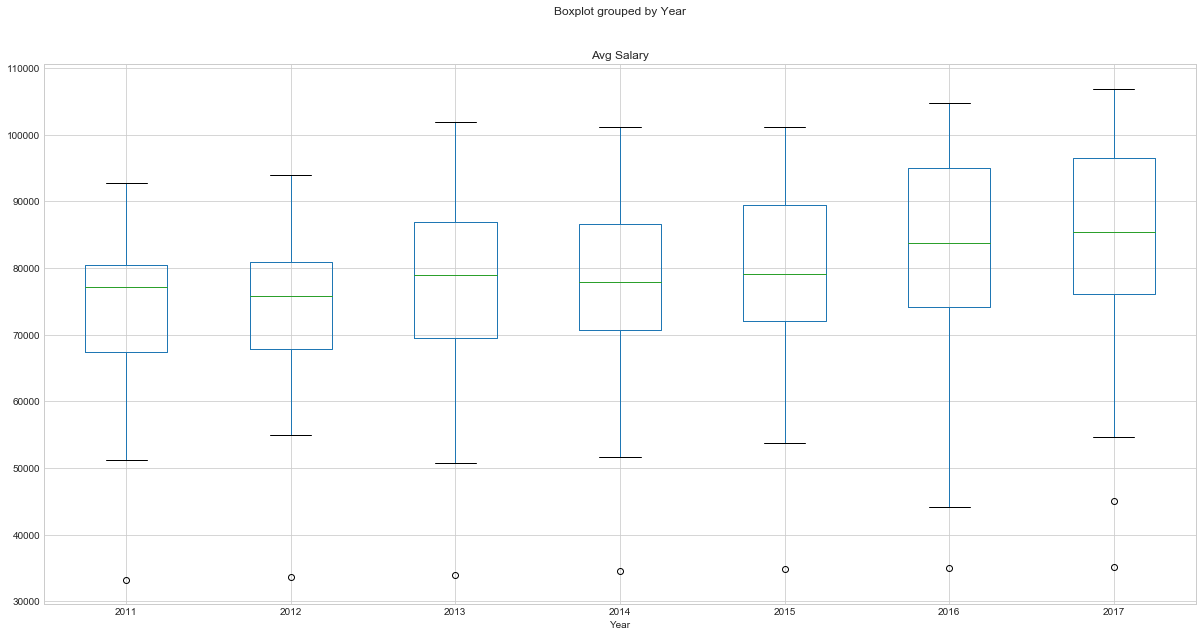

In [27]:
# Create a boxplot to compare means
stat_sal_df.boxplot("Avg Salary", by="Year", figsize=(20, 10))

In [28]:
# Extract individual groups
group1 = stat_sal_df[stat_sal_df["Year"] == 2011]["Avg Salary"]
group2 = stat_sal_df[stat_sal_df["Year"] == 2012]["Avg Salary"]
group3 = stat_sal_df[stat_sal_df["Year"] == 2013]["Avg Salary"]
group4 = stat_sal_df[stat_sal_df["Year"] == 2014]["Avg Salary"]
group5 = stat_sal_df[stat_sal_df["Year"] == 2015]["Avg Salary"]
group6 = stat_sal_df[stat_sal_df["Year"] == 2016]["Avg Salary"]
group7 = stat_sal_df[stat_sal_df["Year"] == 2017]["Avg Salary"]

In [29]:
# Perform the ANOVA analysis
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=2.42800074926264, pvalue=0.02683866507358014)

Text(0,0.5,'Salary Changes')

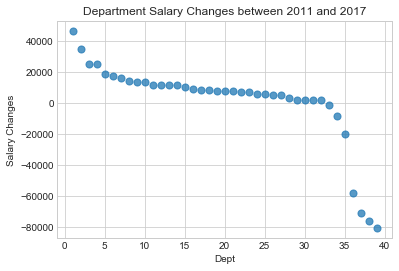

In [30]:
# empty lists to append employee data to
ticks2 = []
salary_changes1 = []

# loop to create ticks for plotting and append above
for x in range(1,len(diff_salaries_sorted)+1):
    ticks2.append(x)

# Loop to append department salary changes to the list above
for x in range(0,len(diff_salaries_sorted)):
    
    salary_changes1.append(diff_salaries_sorted.iloc[x, 1])

# create a dataframe for plotting
salary_changes_df = pd.DataFrame({"Dept": ticks2,
                                 "Salary Changes": salary_changes1})

# plot sorted salary changes
sns.regplot(x=salary_changes_df["Dept"], y=salary_changes_df["Salary Changes"], fit_reg=False, \
                 scatter_kws={"s": 50,"alpha":.75})

# format the plot
plt.title("Department Salary Changes between 2011 and 2017")
plt.ylabel("Salary Changes")